In [78]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score

from rerf.urerf import UnsupervisedRandomForest

In [79]:
# Load dataset
iris = datasets.load_iris()

In [88]:
y = iris.target
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [80]:
X = iris.data

In [81]:
X.shape

(150, 4)

In [89]:
import pandas as pd
sample_df = pd.DataFrame(X,columns=['x'+str(i) for i in range(1,5)])
sample_df.head()

,x1,x2,x3,x4
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<Figure size 576x360 with 0 Axes>

Text(0.5, 0, 'Sepal Length')

Text(0, 0.5, 'Sepal width')

Text(0.5, 1.0, 'Original dataset')

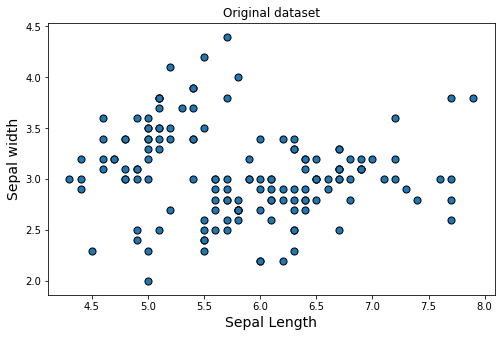

In [91]:
plt.figure(figsize=(8,5))    
plt.scatter(sample_df['x1'],sample_df['x2'],s=50, edgecolors='black')

plt.xlabel('Sepal Length',fontsize=14)
plt.ylabel('Sepal width',fontsize=14)

plt.title("Original dataset")
plt.show()

In [103]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(X)
#X -= X.mean()
center_df = pd.DataFrame(X_scaled,columns=['x'+str(i) for i in range(1,5)])
center_df.head()

,x1,x2,x3,x4
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


<Figure size 576x360 with 0 Axes>

Text(0.5, 0, 'sepal length')

Text(0, 0.5, 'sepal width')

Text(0.5, 1.0, 'Original dataset centered')

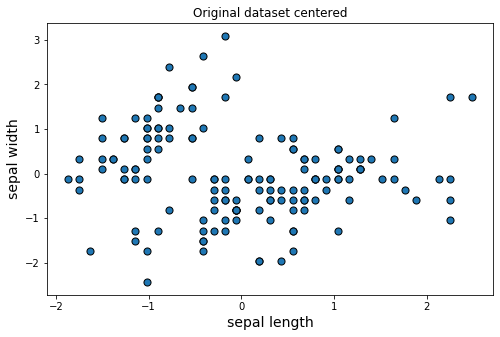

In [105]:
plt.figure(figsize=(8,5))    
plt.scatter(center_df['x1'],center_df['x2'],s=50, edgecolors='black')

plt.xlabel('sepal length',fontsize=14)
plt.ylabel('sepal width',fontsize=14)
plt.title("Original dataset centered")
plt.show()

In [106]:
clf = UnsupervisedRandomForest(projection_matrix="RerF", random_state=0)


In [107]:
clf.fit(X)

UnsupervisedRandomForest(feature_combinations='auto', max_depth=None,
                         max_features='auto', min_samples_split='auto',
                         n_estimators=100, n_jobs=None,
                         projection_matrix='RerF', random_state=0)

In [108]:
sim_mat = clf.transform()
print(sim_mat)

[[1.   0.06 0.05 ... 0.   0.   0.  ]
 [0.08 1.   0.16 ... 0.   0.   0.  ]
 [0.05 0.16 1.   ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 1.   0.05 0.14]
 [0.   0.   0.   ... 0.09 1.   0.01]
 [0.   0.   0.   ... 0.08 0.01 1.  ]]


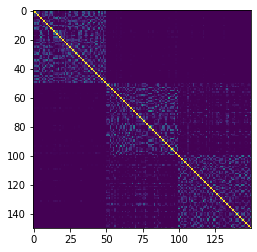

In [95]:
plt.imshow(sim_mat)

In [109]:
sym = (sim_mat + sim_mat.T)/2

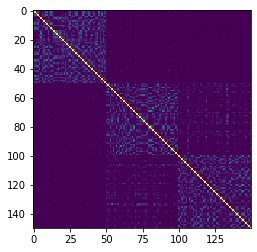

In [110]:
plt.imshow(sym)

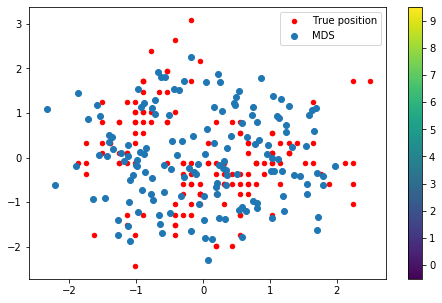

In [114]:
from sklearn.manifold import MDS

embedding = MDS(n_components=4, metric = True, dissimilarity = 'precomputed')
#X_transformed = embedding.fit_transform(sim_mat)
#X_transformed.shape
plt.figure(figsize=(8,5)) 
proj = embedding.fit_transform(sym)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c='r', s=20)
proj *= np.sqrt((X_scaled ** 2).sum()) / np.sqrt((proj ** 2).sum())
plt.scatter(proj[:, 0], proj[:, 1], cmap=plt.cm.get_cmap('jet', 10))
plt.legend(('True position','MDS'), loc='best')
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5);



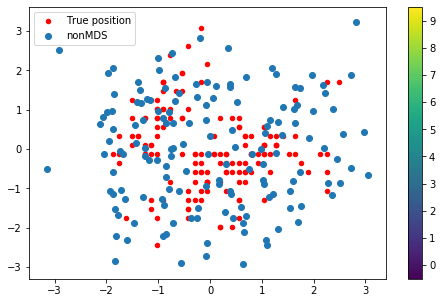

In [116]:
from sklearn.manifold import MDS

embedding = MDS(n_components=4, metric = False, dissimilarity = 'precomputed')

proj1 = embedding.fit_transform(sym)
plt.figure(figsize=(8,5)) 
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c='r', s=20)

npos *= np.sqrt((X_scaled ** 2).sum()) / np.sqrt((proj1 ** 2).sum())

plt.scatter(npos[:, 0], npos[:, 1], cmap=plt.cm.get_cmap('jet', 10))
plt.legend(('True position','nonMDS'), loc='best')
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5);


In [17]:
import numpy as np

In [117]:
def isSymmetric(mat, N): 
    for i in range(N): 
        for j in range(N): 
            if (mat[i][j] != mat[j][i]): 
                return False
    return True

In [119]:
if (isSymmetric(sym, 150)): 
    print ("Yes")
else: 
    print ("No")

Yes


In [124]:
cluster = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
predict_labels = cluster.fit_predict(sim_mat)
score = adjusted_rand_score(y, predict_labels)

print("labels\n", y)
print("predict\n", predict_labels)
print("Adjusted Rand Score:", score)

labels
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
predict
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
Adjusted Rand Score: 0.745503868180448


In [135]:
from scipy.spatial.distance import pdist,squareform
sample_df = pd.DataFrame(proj1,columns=['x'+str(i) for i in range(1,5)])
#sample_df.head()
p_dist = squareform(pdist(sample_df, metric='euclidean'))


In [136]:
if (isSymmetric(p_dist, 150)): 
    print ("Yes")
else: 
    print ("No")

Yes


In [151]:
cluster1 = AgglomerativeClustering(n_clusters=3, affinity="precomputed", linkage="single")
predict_labels1 = cluster1.fit_predict(p_dist)
score1 = adjusted_rand_score(y, predict_labels1)

print("labels\n", y)
print("predict\n", predict_labels1)
print("Adjusted Rand Score:", score1)

labels
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
predict
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0
 0 0]
Adjusted Rand Score: 0.000181430086369852


In [158]:
import numpy as np
import pandas as pd
from scipy.spatial import distance_matrix

# Original code from OP, slightly reformatted
sample_df1 = pd.DataFrame(proj1,columns=['x'+str(i) for i in range(1,5)])

# Whole similarity algorithm in one line
df_euclid =(1 / (1 + distance_matrix(sample_df1, sample_df)))



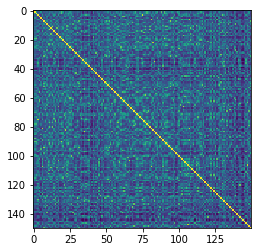

In [178]:
plt.imshow(df_euclid)

In [161]:
df_euclid
if (isSymmetric(df_euclid, 150)): 
    print ("Yes")
else: 
    print ("No")

array([[1.        , 0.51881525, 0.55436626, ..., 0.63515806, 0.53748661,
        0.56480479],
       [0.51881525, 1.        , 0.76357053, ..., 0.58926121, 0.72542432,
        0.55295822],
       [0.55436626, 0.76357053, 1.        , ..., 0.63194923, 0.70955611,
        0.51116873],
       ...,
       [0.63515806, 0.58926121, 0.63194923, ..., 1.        , 0.55002976,
        0.54519487],
       [0.53748661, 0.72542432, 0.70955611, ..., 0.55002976, 1.        ,
        0.5334469 ],
       [0.56480479, 0.55295822, 0.51116873, ..., 0.54519487, 0.5334469 ,
        1.        ]])

Yes


In [179]:
cluster2 = AgglomerativeClustering(n_clusters=3, affinity="precomputed", linkage="single")
predict_labels2 = cluster2.fit_predict(df_euclid)
score2 = adjusted_rand_score(y, predict_labels2)

print("labels\n", y)
print("predict\n", predict_labels2)
print("Adjusted Rand Score:", score2)

labels
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
predict
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
Adjusted Rand Score: -8.890074232113897e-05


In [164]:
from sklearn.metrics.pairwise import euclidean_distances
eu_dist = euclidean_distances(proj1,proj1)
eu_dist.shape

(150, 150)

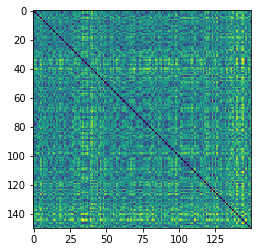

In [165]:
plt.imshow(eu_dist)

In [166]:
np.allclose(sym,df_euclid)

False

In [177]:
ax = None
mse = (np.square(sym - df_euclid)).mean(axis=ax)
print(mse)

0.3450157374876895


In [180]:
noise = np.random.rand(150, 150)
noise = noise + noise.T
noise[np.arange(noise.shape[0]), np.arange(noise.shape[0])] = 0


In [181]:
noise

array([[0.        , 0.89042051, 0.47882495, ..., 0.74676746, 0.85654023,
        1.0114385 ],
       [0.89042051, 0.        , 1.6656341 , ..., 1.27102879, 1.62241485,
        1.24681675],
       [0.47882495, 1.6656341 , 0.        , ..., 0.4679859 , 1.61535216,
        0.59364163],
       ...,
       [0.74676746, 1.27102879, 0.4679859 , ..., 0.        , 0.64602262,
        0.51417702],
       [0.85654023, 1.62241485, 1.61535216, ..., 0.64602262, 0.        ,
        1.21542603],
       [1.0114385 , 1.24681675, 0.59364163, ..., 0.51417702, 1.21542603,
        0.        ]])

In [182]:
noise.shape

(150, 150)

In [192]:
sim_mat += noise

In [193]:
sim_mat

array([[1.        , 1.84084102, 1.00764989, ..., 1.49353492, 1.71308046,
        2.022877  ],
       [1.86084102, 1.        , 3.4912682 , ..., 2.54205759, 3.24482971,
        2.49363351],
       [1.00764989, 3.4912682 , 1.        , ..., 0.93597181, 3.23070433,
        1.18728327],
       ...,
       [1.49353492, 2.54205759, 0.93597181, ..., 1.        , 1.34204525,
        1.16835404],
       [1.71308046, 3.24482971, 3.23070433, ..., 1.38204525, 1.        ,
        2.44085206],
       [2.022877  , 2.49363351, 1.18728327, ..., 1.10835404, 2.44085206,
        1.        ]])

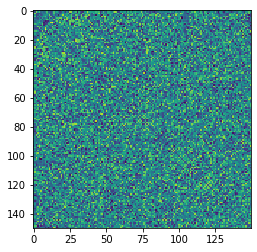

In [205]:
plt.imshow(sim_mat)

In [194]:
noise_diss = 1 - sim_mat

In [195]:
noise_diss

array([[ 0.        , -0.84084102, -0.00764989, ..., -0.49353492,
        -0.71308046, -1.022877  ],
       [-0.86084102,  0.        , -2.4912682 , ..., -1.54205759,
        -2.24482971, -1.49363351],
       [-0.00764989, -2.4912682 ,  0.        , ...,  0.06402819,
        -2.23070433, -0.18728327],
       ...,
       [-0.49353492, -1.54205759,  0.06402819, ...,  0.        ,
        -0.34204525, -0.16835404],
       [-0.71308046, -2.24482971, -2.23070433, ..., -0.38204525,
         0.        , -1.44085206],
       [-1.022877  , -1.49363351, -0.18728327, ..., -0.10835404,
        -1.44085206,  0.        ]])

In [196]:
def symmetrize(graph, method="avg"):
    """
    A function for forcing symmetry upon a graph.
    Parameters
    ----------
    graph: object
        Either array-like, (n_vertices, n_vertices) numpy matrix,
        or an object of type networkx.Graph.
    method: {'avg' (default), 'triu', 'tril',}, optional
        An option indicating which half of the edges to
        retain when symmetrizing. 
            - 'avg'
                Retain the average weight between the upper and lower 
                right triangle, of the adjacency matrix.
            - 'triu'
                Retain the upper right triangle.
            - 'tril'
                Retain the lower left triangle.
            
    Returns
    -------
    graph: array-like, shape (n_vertices, n_vertices)
        the graph with asymmetries removed.
    Examples
    --------
    >>> a = np.array([
    ...    [0, 1, 1], 
    ...    [0, 0, 1], 
    ...    [0, 0, 1]])
    >>> symmetrize(a, method="triu")
    array([[0, 1, 1],
           [1, 0, 1],
           [1, 1, 1]])
    """
    # graph = import_graph(graph)
    if method == "triu":
        graph = np.triu(graph)
    elif method == "tril":
        graph = np.tril(graph)
    elif method == "avg":
        graph = (np.triu(graph) + np.tril(graph)) / 2
    else:
        msg = "You have not passed a valid parameter for the method."
        raise ValueError(msg)
    # A = A + A' - diag(A)
    graph = graph + graph.T - np.diag(np.diag(graph))
    return graph

In [197]:
sym_diss= symmetrize(noise_diss)
print(sym_diss)

[[ 0.         -0.85084102 -0.00764989 ... -0.49353492 -0.71308046
  -1.022877  ]
 [-0.85084102  0.         -2.4912682  ... -1.54205759 -2.24482971
  -1.49363351]
 [-0.00764989 -2.4912682   0.         ...  0.06402819 -2.23070433
  -0.18728327]
 ...
 [-0.49353492 -1.54205759  0.06402819 ...  0.         -0.36204525
  -0.13835404]
 [-0.71308046 -2.24482971 -2.23070433 ... -0.36204525  0.
  -1.44085206]
 [-1.022877   -1.49363351 -0.18728327 ... -0.13835404 -1.44085206
   0.        ]]


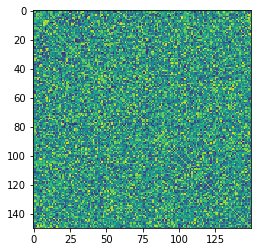

In [198]:
plt.imshow(sym_diss)

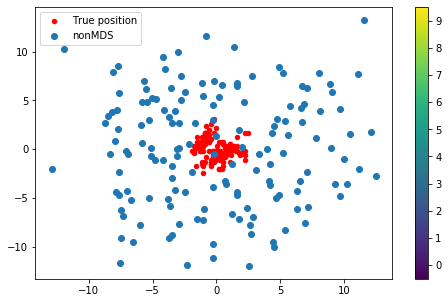

In [201]:
from sklearn.manifold import MDS

embedding3 = MDS(n_components=4, metric = False, dissimilarity = 'precomputed')

proj3 = embedding.fit_transform(sym_diss)
plt.figure(figsize=(8,5)) 
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c='r', s=20)

npos *= np.sqrt((X_scaled ** 2).sum()) / np.sqrt((proj3 ** 2).sum())

plt.scatter(npos[:, 0], npos[:, 1], cmap=plt.cm.get_cmap('jet', 10))
plt.legend(('True position','nonMDS'), loc='best')
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5);

In [203]:
from scipy.spatial.distance import pdist,squareform
sample_df = pd.DataFrame(proj3,columns=['x'+str(i) for i in range(1,5)])
#sample_df.head()
p_dist = squareform(pdist(sample_df, metric='euclidean'))

In [204]:
cluster2 = AgglomerativeClustering(n_clusters=3, affinity="precomputed", linkage="single")
predict_labels2 = cluster2.fit_predict(p_dist)
score2 = adjusted_rand_score(y, predict_labels2)

print("labels\n", y)
print("predict\n", predict_labels2)
print("Adjusted Rand Score:", score2)

labels
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
predict
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0]
Adjusted Rand Score: 0.000181430086369852
